# Image classification

![classification](https://cdn-images-1.medium.com/max/1600/1*XdCMCaHPt-pqtEibUfAnNw.png =600x)

## Essential imports

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Initialize some parameters

In [0]:
batch_size = 128
num_classes = 10
epochs = 10

## Import MNIST dataset
Dataset consist of 60,000 28x28 grayscale images of handwritten digits along with 10,000 test images

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


## Normalize images

In [4]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


##  Convert class vectors to binary class matrices

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Build network

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Loss & Optimizer

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),metrics=['accuracy'])

## Train network

In [9]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.2502 - acc: 0.9236 - val_loss: 0.1145 - val_acc: 0.9641
Epoch 2/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.1031 - acc: 0.9686 - val_loss: 0.0890 - val_acc: 0.9729
Epoch 3/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0751 - acc: 0.9776 - val_loss: 0.0851 - val_acc: 0.9777
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0602 - acc: 0.9821 - val_loss: 0.0951 - val_acc: 0.9749
Epoch 5/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0510 - acc: 0.9851 - val_loss: 0.0836 - val_acc: 0.9778
Epoch 6/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0446 - acc: 0.9866 - val_loss: 0.0770 - val_acc: 0.9804
Epoch 7/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0396 - acc: 0.9884 - val_loss: 0.0870 - val_acc

## Test our model

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08331542932838629
Test accuracy: 0.9824


# Exercise for you

Design a image classifier for cifar10 dataset. Dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

Use the same above code and modify to this problem.

![cifar10](https://samyzaf.com/ML/cifar10/cifar1.jpg)

## Tips


* Train size: `50000x32x32x3`
* Test size: `10000x32x32x3`
* Input size: `32x32x3`

In [0]:
# Load dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 73s 0us/step


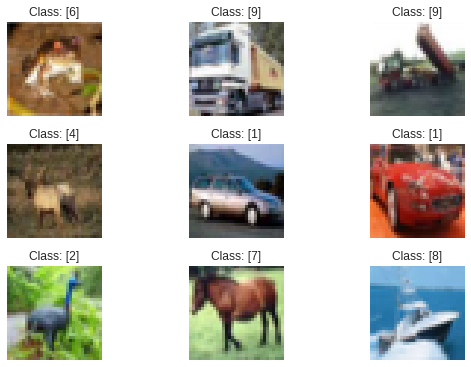

In [0]:
# display dataset
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i,:,:,:], cmap='gray', interpolation='none')
  plt.title("Class: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])